## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore
import geopandas as gpd
from matplotlib.lines import Line2D

pd.set_option('display.max_columns', None)



## Load data

In [2]:
path = '/Users/alexaterrazas/Desktop/Lake Transfer Function Manuscript/'
df = pd.read_csv(path + 'ERA5_LakeTemp.csv')
print(len(df))

df

1395


,Hylak_id,center_long,center_lat,Lake_name,Country,Continent,Lake_type,Lake_area,Depth_avg,Elevation,n_obs,stat_method,intermittency,Tyear_mean,Tyear_mean_open,Tyear_min,Tyear_max,Tyear_CImean_min,Tyear_CImean_max,ice_days,ice_days_min,ice_days_max,ice_start,ice_start_min,ice_start_max,ice_end,ice_end_min,ice_end_max,Tmonth_mean_1,Tmonth_mean_2,Tmonth_mean_3,Tmonth_mean_4,Tmonth_mean_5,Tmonth_mean_6,Tmonth_mean_7,Tmonth_mean_8,Tmonth_mean_9,Tmonth_mean_10,Tmonth_mean_11,Tmonth_mean_12,Tmonth_min_1,Tmonth_min_2,Tmonth_min_3,Tmonth_min_4,Tmonth_min_5,Tmonth_min_6,Tmonth_min_7,Tmonth_min_8,Tmonth_min_9,Tmonth_min_10,Tmonth_min_11,Tmonth_min_12,Tmonth_max_1,Tmonth_max_2,Tmonth_max_3,Tmonth_max_4,Tmonth_max_5,Tmonth_max_6,Tmonth_max_7,Tmonth_max_8,Tmonth_max_9,Tmonth_max_10,Tmonth_max_11,Tmonth_max_12,Tmonth_CImean_min_1,Tmonth_CImean_min_2,Tmonth_CImean_min_3,Tmonth_CImean_min_4,Tmonth_CImean_min_5,Tmonth_CImean_min_6,Tmonth_CImean_min_7,Tmonth_CImean_min_8,Tmonth_CImean_min_9,Tmonth_CImean_min_10,Tmonth_CImean_min_11,Tmonth_CImean_min_12,Tmonth_CImean_max_1,Tmonth_CImean_max_2,Tmonth_CImean_max_3,Tmonth_CImean_max_4,Tmonth_CImean_max_5,Tmonth_CImean_max_6,Tmonth_CImean_max_7,Tmonth_CImean_max_8,Tmonth_CImean_max_9,Tmonth_CImean_max_10,Tmonth_CImean_max_11,Tmonth_CImean_max_12,Tmonth_CIpred_min_1,Tmonth_CIpred_min_2,Tmonth_CIpred_min_3,Tmonth_CIpred_min_4,Tmonth_CIpred_min_5,Tmonth_CIpred_min_6,Tmonth_CIpred_min_7,Tmonth_CIpred_min_8,Tmonth_CIpred_min_9,Tmonth_CIpred_min_10,Tmonth_CIpred_min_11,Tmonth_CIpred_min_12,Tmonth_CIpred_max_1,Tmonth_CIpred_max_2,Tmonth_CIpred_max_3,Tmonth_CIpred_max_4,Tmonth_CIpred_max_5,Tmonth_CIpred_max_6,Tmonth_CIpred_max_7,Tmonth_CIpred_max_8,Tmonth_CIpred_max_9,Tmonth_CIpred_max_10,Tmonth_CIpred_max_11,Tmonth_CIpred_max_12,lswt_ann_avg,lswt_ao_avg,lswt_amj_avg,lswt_jja_avg,lswt_warmest_avg,abs_lat,icesheetlat_minus_abslat,sq_lswt_ann,sq_lswt_ao,sq_lswt_amj,sq_lswt_jja,sq_lswt_warmest,log_lake_area,log_depth,elevation_km,nearest_temp_1,nearest_temp_2,nearest_temp_3,nearest_temp_4,nearest_temp_5,nearest_temp_6,nearest_temp_7,nearest_temp_8,nearest_temp_9,nearest_temp_10,nearest_temp_11,nearest_temp_12,nearest_tcc_1,nearest_tcc_2,nearest_tcc_3,nearest_tcc_4,nearest_tcc_5,nearest_tcc_6,nearest_tcc_7,nearest_tcc_8,nearest_tcc_9,nearest_tcc_10,nearest_tcc_11,nearest_tcc_12,nearest_rh_1,nearest_rh_2,nearest_rh_3,nearest_rh_4,nearest_rh_5,nearest_rh_6,nearest_rh_7,nearest_rh_8,nearest_rh_9,nearest_rh_10,nearest_rh_11,nearest_rh_12,nearest_ssr_1,nearest_ssr_2,nearest_ssr_3,nearest_ssr_4,nearest_ssr_5,nearest_ssr_6,nearest_ssr_7,nearest_ssr_8,nearest_ssr_9,nearest_ssr_10,nearest_ssr_11,nearest_ssr_12,nearest_u10_1,nearest_u10_2,nearest_u10_3,nearest_u10_4,nearest_u10_5,nearest_u10_6,nearest_u10_7,nearest_u10_8,nearest_u10_9,nearest_u10_10,nearest_u10_11,nearest_u10_12,tas_ann_avg,tas_ao_avg,tas_amj_avg,tas_jja_avg,tas_warmest_month,tcc_ann_avg,rh_ann_avg,ssr_ann_avg,u10_ann_avg
0,2,-120.798314,66.045499,Great Bear,Canada,North America,1,30450.640630,72.199997,145,157,0.0,0.0,97.0,272.0,0.0,463.0,73.0,125.0,235.0,191.0,337.0,294.0,312.0,258.0,163.0,137.0,229.0,0.0,0.0,0.0,0.0,0.0,40.0,192.0,375.0,430.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,280.0,339.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,273.0,453.0,463.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,138.0,317.0,346.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,247.0,433.0,513.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,382.0,543.0,759.0,869.0,518.0,24.0,0.0,0.963333,1.651429,0.133333,2.023333,4.30,66.045499,6.045499,0.928011,2.727216,0.017778,4.093878,18.4900,10.323862,4.279440,0.145,-25.360504,-25.885590,-19.531387,-10.493896,-1.000793,2.721466,6.824036,10.075806,7.790649,1.848053,-8.333740,-21.647293,66.647730,68.721820,65.023270,62.227560,60.025450,60.191450,61.893723,64.689255,75.691660,86.023670,91.031820,75.768650,87.322980,82.130610,78.237530,78.935326,89.420250,91.41833,91.081210,85.996210,75.542190,73.726616,78.115

In [3]:
df_sub = df[['lswt_ao_avg', 'abs_lat', 'elevation_km', 'log_lake_area', 'log_depth',
             'tcc_ann_avg', 'rh_ann_avg', 'ssr_ann_avg', 'u10_ann_avg',  'tas_ann_avg']]
             

df_sub

,lswt_ao_avg,abs_lat,elevation_km,log_lake_area,log_depth,tcc_ann_avg,rh_ann_avg,ssr_ann_avg,u10_ann_avg,tas_ann_avg
0,1.651429,66.045499,0.145,10.323862,4.279440,69.828000,83.100494,6855008.5,-0.772132,-6.916099
1,5.915714,61.686169,0.148,10.193702,4.079231,68.507324,82.211360,8087732.0,-0.752795,-4.109226
2,6.167143,47.404209,0.179,11.312569,4.988390,70.047005,82.009660,11453339.0,1.421462,3.403867
3,13.377143,42.800746,0.175,10.963478,4.433195,65.781070,79.898430,13610045.0,1.222900,8.354764
4,11.057143,44.756304,0.175,10.992038,4.091006,67.142430,80.979000,12723721.0,1.852352,6.322446
...,...,...,...,...,...,...,...,...,...,...
1390,34.177143,27.964728,0.350,4.593098,1.252763,30.269270,36.241375,17317706.0,-1.394071,21.850060
1391,32.702857,30.844098,0.117,4.437106,2.251292,32.712025,47.085240,17531248.0,-0.143916,19.793040
1392,22.497143,32.478639,0.060,4.464528,1.686399,33.717556,49.851850,17753004.0,0.328720,19.291960
1393,23.392857,32.418694,0.001,4.577491,3.135494,44.109386,72.814224,14977280.0,0.029541,18.569963


In [4]:
def repeated_cv_TF1(season):
    # Define the features
    features = [season]
    target = 'tas_ann_avg'

    # Prepare the data
    X = df[features]
    y = df[target]

    # Initialize the model
    model = LinearRegression()

    # Perform repeated 10-fold cross-validation to get predictions and calculate residuals
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    y_cv_pred = np.zeros_like(y)

    for train_idx, test_idx in repeated_kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_fold = model.predict(X.iloc[test_idx])
        y_cv_pred[test_idx] = y_pred_fold

    # Calculate residuals
    residuals = y - y_cv_pred

    # Add residuals to the dataframe
    df['residual'] = residuals

    return residuals

In [5]:
def repeated_cv_TF2(season):
    # Define the features
    df['Tw squared'] = np.power(df[season], 2)
    features = [season, 'Tw squared']
    target = 'tas_ann_avg'

    # Prepare the data
    X = df[features]
    y = df[target]

    # Initialize the model
    model = LinearRegression()

    # Perform repeated 10-fold cross-validation to get predictions and calculate residuals
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    y_cv_pred = np.zeros_like(y)

    for train_idx, test_idx in repeated_kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_fold = model.predict(X.iloc[test_idx])
        y_cv_pred[test_idx] = y_pred_fold

    # Calculate residuals
    residuals = y - y_cv_pred

    # Add residuals to the dataframe
    df['residual'] = residuals

    return residuals

In [6]:
def repeated_cv_TF3(season):
    # Define the features
    df['Tw squared'] = np.power(df[season], 2)
    features = [season, 'Tw squared', 'abs_lat']
    target = 'tas_ann_avg'

    # Prepare the data
    X = df[features]
    y = df[target]

    # Initialize the model
    model = LinearRegression()

    # Perform repeated 10-fold cross-validation to get predictions and calculate residuals
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    y_cv_pred = np.zeros_like(y)

    for train_idx, test_idx in repeated_kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_fold = model.predict(X.iloc[test_idx])
        y_cv_pred[test_idx] = y_pred_fold

    # Calculate residuals
    residuals = y - y_cv_pred

    # Add residuals to the dataframe
    df['residual'] = residuals

    return residuals

In [7]:
def repeated_cv_TF4(season):
    # Define the features
    df['Tw squared'] = np.power(df[season], 2)
    features = [season, 'Tw squared', 'abs_lat', 'elevation_km']
    target = 'tas_ann_avg'

    # Prepare the data
    X = df[features]
    y = df[target]

    # Initialize the model
    model = LinearRegression()

    # Perform repeated 10-fold cross-validation to get predictions and calculate residuals
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    y_cv_pred = np.zeros_like(y)

    for train_idx, test_idx in repeated_kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred_fold = model.predict(X.iloc[test_idx])
        y_cv_pred[test_idx] = y_pred_fold

    # Calculate residuals
    residuals = y - y_cv_pred

    # Add residuals to the dataframe
    df['residual'] = residuals

    return residuals

## Hren and Sheldon 

In [8]:
# Custom function where x is 'lswt_ao_avg'
def hs_AO(x):
    return (-0.0146) * np.power(x, 2) + (1.753 * x) - 16.079

def residuals_HS_model_AO():
    # Prepare the data
    x = df['lswt_ao_avg']
    y = df['tas_ann_avg']

    # Initialize the cross-validation procedure
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

    # Arrays to store predictions and R² scores
    y_cv_pred = np.zeros_like(y)
    cv_r2_scores = []

    # Manually perform repeated 10-fold cross-validation to get predictions
    for train_idx, test_idx in repeated_kf.split(x):
        # Training and testing sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Predict y using the custom function on the test set
        y_pred_test = hs_AO(x_test)

        # Store the predictions
        y_cv_pred[test_idx] = y_pred_test

        # Calculate R² score for this fold and store it
        r2 = r2_score(y_test, y_pred_test)
        cv_r2_scores.append(r2)

    # Calculate the mean and standard deviation of the cross-validation R² scores
    mean_cv_score = np.mean(cv_r2_scores)
    std_cv_score = np.std(cv_r2_scores)

    # Calculate the overall R² score from the cross-validated predictions
    r2_cv = r2_score(y, y_cv_pred)

    # Now, let's split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Predict using the training set and calculate R² for train and test sets
    y_train_pred = hs_AO(x_train)
    y_test_pred = hs_AO(x_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

#     # Print the cross-validation and train/test R² results
#     print(f'Mean Repeated 10-Fold CV R^2 Score: {mean_cv_score:.4f}')
#     print(f'Standard Deviation of Repeated 10-Fold CV R^2 Scores: {std_cv_score:.4f}')
#     print(f'Cross-Validation R^2 Score from Predictions: {r2_cv:.4f}')
#     print(f'R-squared for Train: {r2_train:.4f}')
#     print(f'R-squared for Test: {r2_test:.4f}')

    # Calculate residuals
    residuals = y - y_cv_pred

    return residuals

In [9]:
# Custom function where x is 'lswt_ao_avg'
def hs_AMJ(x):
    return (-0.0097)*np.power(x,2) + (1.379 * x) - 8.227

def residuals_HS_model_AMJ():
    # Prepare the data
    x = df['lswt_amj_avg']
    y = df['tas_ann_avg']

    # Initialize the cross-validation procedure
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

    # Arrays to store predictions and R² scores
    y_cv_pred = np.zeros_like(y)
    cv_r2_scores = []

    # Manually perform repeated 10-fold cross-validation to get predictions
    for train_idx, test_idx in repeated_kf.split(x):
        # Training and testing sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Predict y using the custom function on the test set
        y_pred_test = hs_AMJ(x_test)

        # Store the predictions
        y_cv_pred[test_idx] = y_pred_test

        # Calculate R² score for this fold and store it
        r2 = r2_score(y_test, y_pred_test)
        cv_r2_scores.append(r2)

    # Calculate the mean and standard deviation of the cross-validation R² scores
    mean_cv_score = np.mean(cv_r2_scores)
    std_cv_score = np.std(cv_r2_scores)

    # Calculate the overall R² score from the cross-validated predictions
    r2_cv = r2_score(y, y_cv_pred)

    # Now, let's split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Predict using the training set and calculate R² for train and test sets
    y_train_pred = hs_AMJ(x_train)
    y_test_pred = hs_AMJ(x_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate residuals
    residuals = y - y_cv_pred

    return residuals


In [10]:
# Custom function where x is 'lswt_ao_avg'
def hs_JJA(x):
    return (-0.0055)*np.power(x,2) + (1.476 * x) - 18.915

def residuals_HS_model_JJA():
    # Prepare the data
    x = df['lswt_jja_avg']
    y = df['tas_ann_avg']

    # Initialize the cross-validation procedure
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

    # Arrays to store predictions and R² scores
    y_cv_pred = np.zeros_like(y)
    cv_r2_scores = []

    # Manually perform repeated 10-fold cross-validation to get predictions
    for train_idx, test_idx in repeated_kf.split(x):
        # Training and testing sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Predict y using the custom function on the test set
        y_pred_test = hs_JJA(x_test)

        # Store the predictions
        y_cv_pred[test_idx] = y_pred_test

        # Calculate R² score for this fold and store it
        r2 = r2_score(y_test, y_pred_test)
        cv_r2_scores.append(r2)

    # Calculate the mean and standard deviation of the cross-validation R² scores
    mean_cv_score = np.mean(cv_r2_scores)
    std_cv_score = np.std(cv_r2_scores)

    # Calculate the overall R² score from the cross-validated predictions
    r2_cv = r2_score(y, y_cv_pred)

    # Now, let's split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Predict using the training set and calculate R² for train and test sets
    y_train_pred = hs_JJA(x_train)
    y_test_pred = hs_JJA(x_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate residuals
    residuals = y - y_cv_pred

    return residuals

In [11]:
# Custom function where x is 'lswt_ao_avg'
def hs_Warmest(x):
    return (x/0.562) - (17.3/0.562)

def residuals_HS_model_Warmest():
    # Prepare the data
    x = df['lswt_warmest_avg']
    y = df['tas_ann_avg']

    # Initialize the cross-validation procedure
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

    # Arrays to store predictions and R² scores
    y_cv_pred = np.zeros_like(y)
    cv_r2_scores = []

    # Manually perform repeated 10-fold cross-validation to get predictions
    for train_idx, test_idx in repeated_kf.split(x):
        # Training and testing sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Predict y using the custom function on the test set
        y_pred_test = hs_JJA(x_test)

        # Store the predictions
        y_cv_pred[test_idx] = y_pred_test

        # Calculate R² score for this fold and store it
        r2 = r2_score(y_test, y_pred_test)
        cv_r2_scores.append(r2)

    # Calculate the mean and standard deviation of the cross-validation R² scores
    mean_cv_score = np.mean(cv_r2_scores)
    std_cv_score = np.std(cv_r2_scores)

    # Calculate the overall R² score from the cross-validated predictions
    r2_cv = r2_score(y, y_cv_pred)

    # Now, let's split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Predict using the training set and calculate R² for train and test sets
    y_train_pred = hs_JJA(x_train)
    y_test_pred = hs_JJA(x_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate residuals
    residuals = y - y_cv_pred

    return residuals

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore
import geopandas as gpd

# Custom function where x is 'lswt_ao_avg'
def hs_annual(x):
    return (-0.0318)*np.power(x,2) + (2.195 * x) - 12.607

def residuals_HS_model_ann():
    # Prepare the data
    x = df['lswt_ann_avg']
    y = df['tas_ann_avg']

    # Initialize the cross-validation procedure
    repeated_kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

    # Arrays to store predictions and R² scores
    y_cv_pred = np.zeros_like(y)
    cv_r2_scores = []

    # Manually perform repeated 10-fold cross-validation to get predictions
    for train_idx, test_idx in repeated_kf.split(x):
        # Training and testing sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Predict y using the custom function on the test set
        y_pred_test = hs_annual(x_test)

        # Store the predictions
        y_cv_pred[test_idx] = y_pred_test

        # Calculate R² score for this fold and store it
        r2 = r2_score(y_test, y_pred_test)
        cv_r2_scores.append(r2)

    # Calculate the mean and standard deviation of the cross-validation R² scores
    mean_cv_score = np.mean(cv_r2_scores)
    std_cv_score = np.std(cv_r2_scores)

    # Calculate the overall R² score from the cross-validated predictions
    r2_cv = r2_score(y, y_cv_pred)

    # Now, let's split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # Predict using the training set and calculate R² for train and test sets
    y_train_pred = hs_annual(x_train)
    y_test_pred = hs_annual(x_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

#     # Print the cross-validation and train/test R² results
#     print(f'Mean Repeated 10-Fold CV R^2 Score: {mean_cv_score:.4f}')
#     print(f'Standard Deviation of Repeated 10-Fold CV R^2 Scores: {std_cv_score:.4f}')
#     print(f'Cross-Validation R^2 Score from Predictions: {r2_cv:.4f}')
#     print(f'R-squared for Train: {r2_train:.4f}')
#     print(f'R-squared for Test: {r2_test:.4f}')

    # Calculate residuals
    residuals = y - y_cv_pred

    return residuals

## Figure 4

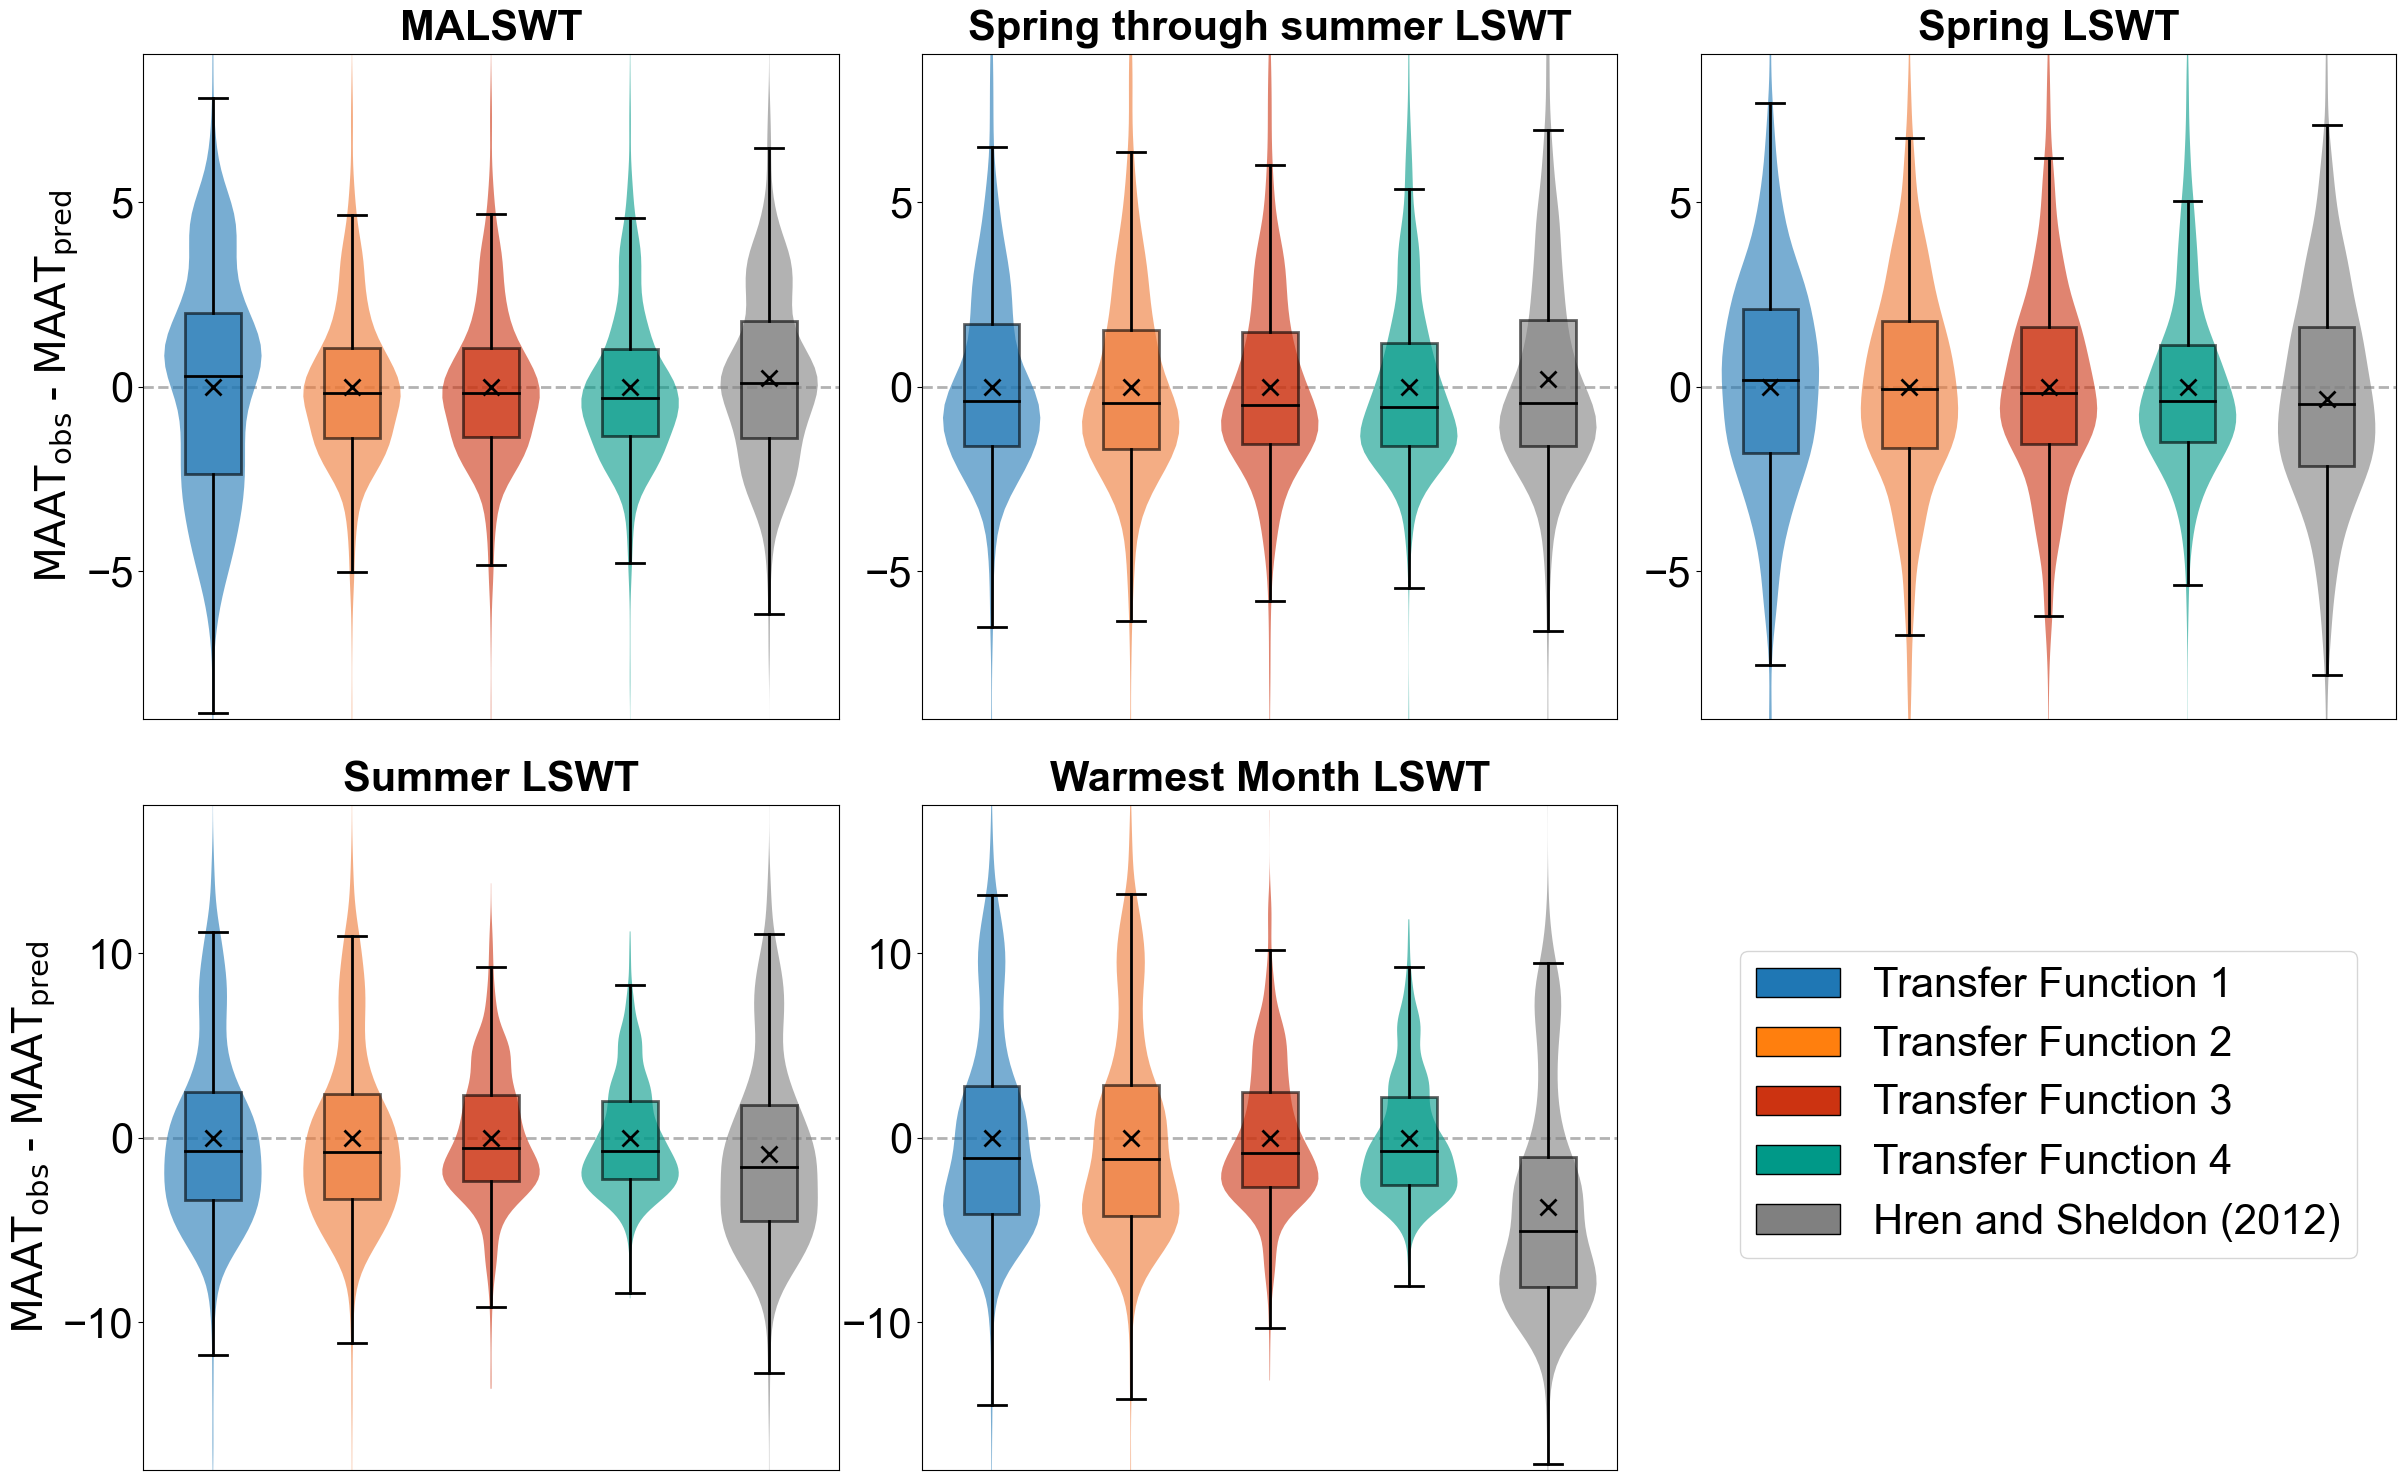

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 30

# Define the custom colors
colors = [plt.cm.tab10(0), '#EE7733', '#CC3311', '#009988', 'gray']

# Assuming repeated_cv_TF1, repeated_cv_TF2, repeated_cv_TF3, and repeated_cv_TF4 return the residual data
data_bp1 = [repeated_cv_TF1('lswt_ann_avg'), repeated_cv_TF2('lswt_ann_avg'), repeated_cv_TF3('lswt_ann_avg'), repeated_cv_TF4('lswt_ann_avg'), residuals_HS_model_ann()] 
data_bp2 = [repeated_cv_TF1('lswt_ao_avg'), repeated_cv_TF2('lswt_ao_avg'), repeated_cv_TF3('lswt_ao_avg'), repeated_cv_TF4('lswt_ao_avg'), residuals_HS_model_AO()] 
data_bp3 = [repeated_cv_TF1('lswt_amj_avg'), repeated_cv_TF2('lswt_amj_avg'), repeated_cv_TF3('lswt_amj_avg'), repeated_cv_TF4('lswt_amj_avg'), residuals_HS_model_AMJ()] 
data_bp4 = [repeated_cv_TF1('lswt_jja_avg'), repeated_cv_TF2('lswt_jja_avg'), repeated_cv_TF3('lswt_jja_avg'), repeated_cv_TF4('lswt_jja_avg'), residuals_HS_model_JJA()] 
data_bp5 = [repeated_cv_TF1('lswt_warmest_avg'), repeated_cv_TF2('lswt_warmest_avg'), repeated_cv_TF3('lswt_warmest_avg'), repeated_cv_TF4('lswt_warmest_avg'), residuals_HS_model_Warmest()] 

# Convert your data to DataFrames for easier plotting with Matplotlib
data1 = pd.DataFrame({
    'TF1': data_bp1[0],
    'TF2': data_bp1[1],
    'TF3': data_bp1[2],
    'TF4': data_bp1[3],
    'HS': data_bp1[4]
})

data2 = pd.DataFrame({
    'TF1': data_bp2[0],
    'TF2': data_bp2[1],
    'TF3': data_bp2[2],
    'TF4': data_bp2[3],
    'HS': data_bp2[4]
})

data3 = pd.DataFrame({
    'TF1': data_bp3[0],
    'TF2': data_bp3[1],
    'TF3': data_bp3[2],
    'TF4': data_bp3[3],
    'HS': data_bp3[4]
})

data4 = pd.DataFrame({
    'TF1': data_bp4[0],
    'TF2': data_bp4[1],
    'TF3': data_bp4[2],
    'TF4': data_bp4[3],
    'HS': data_bp4[4]
})

data5 = pd.DataFrame({
    'TF1': data_bp5[0],
    'TF2': data_bp5[1],
    'TF3': data_bp5[2],
    'TF4': data_bp5[3],
    'HS': data_bp5[4]
})

# Create the figure and three axes
fig, axs = plt.subplots(2, 3, figsize=(25, 15.5))

# Function to plot on a given axis
def plot_violin_box(ax, data, title):
    # Widen the violin plots
    for i, col in enumerate(data.columns):
        parts = ax.violinplot(data[col], positions=[i], showmeans=False, showmedians=False, showextrema=False, widths=0.7)
        for pc in parts['bodies']:
            pc.set_facecolor(colors[i])
            pc.set_edgecolor('none')
            pc.set_alpha(0.6)
    
    # Define flier properties for outliers
    flierprops = dict(marker='o', color='gray', markerfacecolor='gray', markersize=5, linestyle='none', alpha = 0.5)

    # Overlay the box plot with the corresponding face colors
    box = ax.boxplot(data.values, patch_artist=True, positions=np.arange(len(data.columns)), widths=0.4, zorder=2, flierprops=flierprops, showfliers=False)  # Widen the box plots

    # Set colors and linewidths for each boxplot element
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_linewidth(2)  # Set box linewidth
        patch.set_alpha(0.6)

    plt.setp(box['whiskers'], color='black', linewidth=2)
    plt.setp(box['caps'], color='black', linewidth=2)
    plt.setp(box['medians'], color='black', linewidth=2)

    # Add an "X" marker at the mean of each boxplot
    for i, patch in enumerate(box['boxes']):
        mean = np.mean(data.iloc[:, i])
        ax.plot(i, mean, 'x', color='black', markersize=12, markeredgewidth=2, zorder=4)  # Larger and thicker X marker

    # Customize the appearance of the plot
    ax.axhline(0, color='grey', linestyle='--', linewidth=2, alpha=0.6, zorder=0)
    ax.set_title(title, fontsize=30, fontweight = 'bold', pad = 10)  # Title font size and weight
    
    # Remove x-axis labels and ticks
    ax.set_xticklabels([])
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    
    # Increase y-axis tick label size
    ax.tick_params(axis='y', labelsize=30)

# Function to add the legend
def legend_plots():
    blue = plt.cm.tab10(0)
    orange = plt.cm.tab10(1)
    red =  '#CC3311'
    green =  '#009988'
    gray = 'gray'

    
    # Define the rectangles for the legend
    tf1 = mpatches.Rectangle((0, 0), 1, 1, facecolor=blue, edgecolor="black", label='TF1')
    tf2 = mpatches.Rectangle((0, 0), 1, 1, facecolor=orange, edgecolor="black", label='TF2')
    tf3 = mpatches.Rectangle((0, 0), 1, 1, facecolor=red, edgecolor="black", label='TF3')
    tf4 = mpatches.Rectangle((0, 0), 1, 1, facecolor=green, edgecolor="black", label='TF4')
    hs = mpatches.Rectangle((0, 0), 1, 1, facecolor=gray, edgecolor="black", label='HS')

    # Create the legend
    axs[1, 2].legend(handles=[tf1, tf2, tf3, tf4, hs], 
                    labels=['Transfer Function 1', 'Transfer Function 2', 'Transfer Function 3', 'Transfer Function 4', 'Hren and Sheldon (2012)'],
                    loc='center', bbox_to_anchor=(0.5, 0.55), frameon=True, fontsize=30)

    return

# Plot on each axis
plot_violin_box(axs[0,0], data1, 'MALSWT')
plot_violin_box(axs[0,1], data2, 'Spring through summer LSWT')
plot_violin_box(axs[0,2], data3, 'Spring LSWT')
plot_violin_box(axs[1,0], data4, 'Summer LSWT')
plot_violin_box(axs[1,1], data5, 'Warmest Month LSWT')

# Set the y-axis labels with larger font size
axs[0, 0].set_ylabel(r'$\mathrm{MAAT}_{\mathrm{obs}}$ - $\mathrm{MAAT}_{\mathrm{pred}}$', fontsize=30)
axs[1, 0].set_ylabel(r'$\mathrm{MAAT}_{\mathrm{obs}}$ - $\mathrm{MAAT}_{\mathrm{pred}}$', fontsize=30)

# Hide the empty subplot (bottom-right)
axs[1, 2].axis('off')

legend_plots()

axs[0,0].set_ylim(-9,9)
axs[0,1].set_ylim(-9,9)
axs[0,2].set_ylim(-9,9)

axs[1,0].set_ylim(-18,18)
axs[1,1].set_ylim(-18,18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.13)  # Adjust the space between rows
plt.subplots_adjust(wspace=0.12)  # Adjust the space between rows

plt.savefig('Fig5_091124.png', dpi = 300, bbox_inches = 'tight')
plt.show()
